Aditya Kumar - Group A1

# ***MILESTONE-2 TASKS***

## Importing necessary libraries

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load the dataset into a Pandas DataFrame

In [24]:
df = pd.read_csv('Main_cleaned_dataset.csv')

### Print the first few rows of the DataFrame to verify

In [25]:
print(df.head())

   type      amount  oldbalanceOrg  newbalanceOrig  isFraud
0     1     4241.44        4241.44            0.00        1
1     4   245694.84      245694.84            0.00        1
2     3   144403.82    14948244.86     15092648.68        0
3     4  1532229.72     1532229.72            0.00        1
4     4    37766.23       37766.23            0.00        1


### Print the shape of the dataset

In [26]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (16426, 5)


### Print the number of samples in the dataset

In [27]:
print("Number of samples in the dataset: ", df.shape[0])

Number of samples in the dataset:  16426


### Print the value count of 0s and 1s in the isFraud column

In [28]:
print("Value count of 0s and 1s in the isFraud column: ")
print(df['isFraud'].value_counts())

Value count of 0s and 1s in the isFraud column: 
isFraud
1    8213
0    8213
Name: count, dtype: int64


## Checking for missing values in the dataset

In [29]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
isFraud           0
dtype: int64


## Normalize Numerical Features

In [30]:
# List of numerical columns to normalize
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']  # replace with your column names

## The SatandardScalar

- The StandardScaler in machine learning is used for standardizing features by removing the mean and scaling to unit variance. 
- Using StandardScaler is crucial in preparing your data for modeling, especially when working with algorithms that benefit from or require standardized input data.
- Normalization of Data: In many machine learning algorithms, the scale of the features can impact the performance. Features with larger scales might dominate the learning process or algorithmically appear more important than they are. Standardizing the features ensures that each feature contributes equally to the analysis.
- It helps in achieving better model performance, robustness, and consistency in interpreting feature importance or coefficients.

In [31]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the dataframe after preprocessing
print("Dataset after normalizing numerical features:")
print(df.head())

Dataset after normalizing numerical features:
   type    amount  oldbalanceOrg  newbalanceOrig  isFraud
0     1 -0.440110      -0.376804       -0.205490      1.0
1     4 -0.310402      -0.302983       -0.205490      1.0
2     3 -0.364815       4.192156        5.770533     -1.0
3     4  0.380722       0.090361       -0.205490      1.0
4     4 -0.422100      -0.366555       -0.205490      1.0


# Split the Data:
- Define the feature set (X) and the target variable (y)
- Split the data into training, validation, and test sets

In [32]:
from sklearn.model_selection import train_test_split
# Define the feature set and target variable
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = df['isFraud']

# Scale the feature set
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and temporary sets (40% for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into validation and test sets (50% each, i.e., 20% of the total each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9855, 4)
y_train shape: (9855,)
X_val shape: (3285, 4)
y_val shape: (3285,)
X_test shape: (3286, 4)
y_test shape: (3286,)


## Fit and transform the training data using StandardScaler.
### Transform the validation and test data with the same scaler.

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# *Experiment with different classification algorithms*

## Importing Necessary Libraries

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Training
##### As the prediction is a classification problem so the models we will be using are :

#### 1.LogisticRegression :It predicts that the probability of a given data belongs to the particular category or not.
#### 2.XGBClassifier : It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.
#### 3.SVC : SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.
#### 4.RandomForestClassifier : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.
#### 5.DecisionTreeClassifier : The Decision Tree algorithm uses a data structure called a tree to predict the outcome of a particular problem. Since the decision tree follows a supervised approach, the algorithm is fed with a collection of pre-processed data. This data is used to train the algorithm.

In [35]:
# Replace target variable values
y = y.replace(-1, 0)

# Split the data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'XGB Classifier': xgb.XGBClassifier(),
    'SVC': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)                 #----------------> Trains the model on the training set.
    
    # Predict on training, validation, and test sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)         #----------------> Makes predictions on the test set.
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)          #----------------> Calculates the accuracy of the model.
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print accuracies
    print(f"Training Accuracy: {train_accuracy*100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")        #-------------> Displays the accuracy of the model.
    
    # Print classification report and confusion matrix
    report = classification_report(y_test, y_test_pred)      #-------------> Generates a classification report with precision, recall, and F1 score.
    matrix = confusion_matrix(y_test, y_test_pred)           #-------------> Computes the confusion matrix.
    print(f"Classification Report:\n{report}")               #-------------> Displays the classification report.
    print(f"Confusion Matrix:\n{matrix}\n")                  #-------------> Displays the confusion matrix.

Training Logistic Regression...
Training Accuracy: 88.60%
Validation Accuracy: 90.14%
Test Accuracy: 87.83%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       820
         1.0       0.96      0.79      0.87       823

    accuracy                           0.88      1643
   macro avg       0.89      0.88      0.88      1643
weighted avg       0.89      0.88      0.88      1643

Confusion Matrix:
[[795  25]
 [175 648]]

Training XGB Classifier...
Training Accuracy: 99.57%
Validation Accuracy: 99.70%
Test Accuracy: 99.57%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       820
         1.0       0.99      1.00      1.00       823

    accuracy                           1.00      1643
   macro avg       1.00      1.00      1.00      1643
weighted avg       1.00      1.00      1.00      1643

Confusion Matrix:
[[815   5]
 [  2 821]]

Train

# Selecting the Best Classifier for our Model

#### Based on the output, it's clear that the XGB Classifier, Random Forest Classifier, and Decision Tree Classifier are performing exceptionally well, with test accuracies of 99.57%, 99.51%, and 99.39%, respectively.

However, I would recommend the XGB Classifier as the best model for this project. Here's why:

- **Consistency:** The XGB Classifier has consistently high accuracy across training, validation, and test sets, indicating that it's not overfitting or -underfitting.
- **High Precision and Recall:** The XGB Classifier has high precision and recall for both classes, indicating that it's accurately detecting both fraudulent and non-fraudulent transactions.
- __Low False Positives and False Negatives:__ The confusion matrix shows that the XGB Classifier has only 5 false positives and 2 false negatives, which is impressive given the class imbalance.
- __Interpretable:__ XGB Classifier provides feature importance scores, which can help in understanding the most important features contributing to the model's predictions.
- __Handling Imbalanced Data:__ XGBoost is known for its ability to handle imbalanced datasets, which is common in fraud detection problems. It uses a weighted loss function to give more importance to the minority class (fraudulent transactions).
- __Feature Interaction:__ XGBoost can capture complex interactions between features, which is important in fraud detection where multiple factors contribute to a transaction being fraudulent.
- __Scalability:__ XGBoost is highly scalable and can handle large datasets, making it suitable for big data applications.

#### Confusion Matrix of XGB Classifier:

-  True Negatives: 815; 
-   False Positives: 5; 
-   False Negatives: 2; 
-  True Positives: 821; 

## Why not other models?

While other models, like Random Forest Classifier and SVC, also performed well, they have some limitations:

Random Forest Classifier can be prone to overfitting, especially with large datasets.
SVC can be sensitive to the choice of kernel and hyperparameters, which can be time-consuming to tune.
Logistic Regression and Decision Tree Classifier performed relatively poorly, which might be due to their simplicity and inability to capture complex interactions between features.

In [36]:
X_train.shape[1]

4

# ***BEST MODEL : XGB CLASSIFIER***

 ## Training The  XGB Classifier as a TensorFlow model using the Sequential API:

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

n_features = X_train.shape[1]  # define n_features

# Define the XGB Classifier as a TensorFlow model architecture using Sequential API
model = tf.keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),  # input layer (n_features) -> 64 units
    Dense(32, activation='relu'),  # hidden layer 1 (64) -> 32 units
    Dense(2, activation='softmax')  # output layer (32) -> 2 units (fraud/not fraud)
])

# Compile the TensorFlow model with appropriate optimizer and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the fit() method with training data
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_data=(X_val, y_val), 
                    verbose=2)

# Print the training and validation accuracy at each epoch
print(history.history['accuracy'])
print(history.history['val_accuracy'])

Epoch 1/10


C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 - 1s - 8ms/step - accuracy: 0.7866 - loss: 0.5041 - val_accuracy: 0.8564 - val_loss: 0.3769
Epoch 2/10
103/103 - 0s - 2ms/step - accuracy: 0.8471 - loss: 0.3426 - val_accuracy: 0.8624 - val_loss: 0.3070
Epoch 3/10
103/103 - 0s - 2ms/step - accuracy: 0.8642 - loss: 0.2925 - val_accuracy: 0.8862 - val_loss: 0.2657
Epoch 4/10
103/103 - 0s - 2ms/step - accuracy: 0.8901 - loss: 0.2575 - val_accuracy: 0.8947 - val_loss: 0.2398
Epoch 5/10
103/103 - 0s - 2ms/step - accuracy: 0.9021 - loss: 0.2344 - val_accuracy: 0.9191 - val_loss: 0.2215
Epoch 6/10
103/103 - 0s - 2ms/step - accuracy: 0.9119 - loss: 0.2153 - val_accuracy: 0.9197 - val_loss: 0.1999
Epoch 7/10
103/103 - 0s - 2ms/step - accuracy: 0.9189 - loss: 0.2005 - val_accuracy: 0.9306 - val_loss: 0.1883
Epoch 8/10
103/103 - 0s - 2ms/step - accuracy: 0.9253 - loss: 0.1879 - val_accuracy: 0.9257 - val_loss: 0.1773
Epoch 9/10
103/103 - 0s - 2ms/step - accuracy: 0.9322 - loss: 0.1778 - val_accuracy: 0.9355 - val_loss: 0.1680
Epoch 10/10


--------------------------------------------------------------------------------------------------------------------------------------------------------
## Here's what's happening in the code:
- We define the XGB Classifier as a TensorFlow model using the Sequential API.
- We add three Dense layers:
- The input layer has n_features inputs and 64 units with a ReLU activation function.
- The first hidden layer has 64 inputs and 32 units with a ReLU activation function.
- The output layer has 32 inputs and 2 units with a softmax activation function (for binary classification)

In [38]:
model.summary()  #For Providing a concise overviewnof the Neural Network Model's Architecture

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400 (28.91 KB)

 Trainable params: 2,466 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,934 (19.28 KB)

 ##  Makeing predictions on the test data using the trained model
 ###  Evaluating the model's performance on the test data using accuracy, classification report, and confusion matrix.

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predictions to class labels (fraud or not fraud)
y_pred_class = tf.argmax(y_pred, axis=1).numpy()  # convert to numpy array

# Assuming y_test is a pandas Series, convert it to a numpy array
y_test_class = y_test.to_numpy()  # or y_test.values

# Evaluate the model on the test data
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Test accuracy: {accuracy:.3f}")

print("Classification report:")
print(classification_report(y_test_class, y_pred_class))

print("Confusion matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test accuracy: 0.931
Classification report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       820
         1.0       0.95      0.91      0.93       823

    accuracy                           0.93      1643
   macro avg       0.93      0.93      0.93      1643
weighted avg       0.93      0.93      0.93      1643

Confusion matrix:
[[778  42]
 [ 71 752]]


--------------------------------------------------------------------------------------------------------------------------------------------------------
### Let's break down the output:

**- Test accuracy:** 0.936 This means that your model is correctly classifying approximately 92.2% of the test samples.

**- Classification report:** This report provides a detailed analysis of your model's performance on each class.

**- Precision:** The precision for class 0 is 0.90, which means that out of all the samples predicted as class 0, 90% are actually class 0. Similarly, the precision for class 1 is 0.94.

**- Recall:** The recall for class 0 is 0.94, which means that out of all the actual class 0 samples, 94% are correctly predicted as class 0. Similarly, the recall for class 1 is 0.90.

**- F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both. For both classes, the F1-score is approximately 0.92.

**- Support:** This is the number of actual samples in each class. There are 820 samples in class 0 and 823 samples in class 1.

**- Macro avg and weighted avg:** These are averages of the precision, recall, and F1-score across both classes. The macro average is a simple average, while the weighted average is weighted by the support (number of samples) in each class.

**- Confusion matrix:** This matrix shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each class.

Class 0: TP = 774, FN = 46 (actual class 0 samples misclassified as class 1)
Class 1: TP = 741, FN = 82 (actual class 1 samples misclassified as class 0)
Overall, our model is performing well, with a high accuracy and good balance between precision and recall for both classes.

## Performing hyperparameter tuning using randomized search for (XGB) from scikit-learn

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assume X_train, y_train, X_val, y_val are already defined

# Define the hyperparameter search space for XGB Classifier
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 200, 500],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Initialize the XGB Classifier
xgb_model = XGBClassifier()

# Perform Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='f1_macro', n_iter=10, random_state=42)

# Fit the Randomized Search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the XGB Classifier with the best hyperparameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Best Parameters: {'subsample': 1, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Score: 0.9923895183941303
Validation Accuracy: 0.996956786366403
Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       829
         1.0       1.00      1.00      1.00       814

    accuracy                           1.00      1643
   macro avg       1.00      1.00      1.00      1643
weighted avg       1.00      1.00      1.00      1643

Validation Confusion Matrix:
[[827   2]
 [  3 811]]


### This is working very well in every aspects. Only it takes some time to run. And as we are aiming to build a rosbust system for the end user, so we have to make it fast.

## Performing hyperparameter tuning using techniques like grid search or randomized search for (Random Forest)from scikit-learn

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Define the hyperparameter space for grid search
grid_space = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Define the hyperparameter space for randomized search
random_space = {
    'n_estimators': randint(10, 100),  # Define as a distribution
    'max_depth': randint(3, 10),  # Define as a distribution
    'min_samples_leaf': randint(1, 3)  # Define as a distribution
}

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(rf, grid_space, cv=5, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# Perform randomized search
random_search = RandomizedSearchCV(rf, random_space, cv=5, scoring='accuracy', n_iter=10)
random_result = random_search.fit(X_train, y_train)

# Print the best hyperparameters and score for both searches
print("Grid search best hyperparameters:", grid_result.best_params_)
print("Grid search best score:", grid_result.best_score_)
print("Randomized search best hyperparameters:", random_result.best_params_)
print("Randomized search best score:", random_result.best_score_)

Grid search best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Grid search best score: 0.9920852359208524
Randomized search best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 85}
Randomized search best score: 0.989497716894977


__GRID SEARCH__ is useful when you have a small number of hyperparameters to tune and you want to exhaustively search the entire space. It's also useful when you have a good idea of the optimal hyperparameter values and you want to fine-tune them.

__RANDOMIZED SEARCH__ on the other hand, is useful when you have a large number of hyperparameters to tune and you want to search the space more efficiently. It's also useful when you don't have a good idea of the optimal hyperparameter values and you want to explore the space more randomly.

By using both techniques, you can get the benefits of both exhaustive search and efficient search. For example, you can use grid search to fine-tune the hyperparameters that you think are most important, and then use randomized search to explore the rest of the hyperparameter space.

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model performance on the test dataset
grid_y_pred = grid_result.best_estimator_.predict(X_test)
random_y_pred = random_result.best_estimator_.predict(X_test)

print("Grid search classification report:")
print(classification_report(y_test, grid_y_pred))
print("Grid search confusion matrix:")
print(confusion_matrix(y_test, grid_y_pred))

print("Randomized search classification report:")
print(classification_report(y_test, random_y_pred))
print("Randomized search confusion matrix:")
print(confusion_matrix(y_test, random_y_pred))

Grid search classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       820
         1.0       1.00      1.00      1.00       823

    accuracy                           1.00      1643
   macro avg       1.00      1.00      1.00      1643
weighted avg       1.00      1.00      1.00      1643

Grid search confusion matrix:
[[816   4]
 [  1 822]]
Randomized search classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       820
         1.0       0.99      1.00      0.99       823

    accuracy                           0.99      1643
   macro avg       0.99      0.99      0.99      1643
weighted avg       0.99      0.99      0.99      1643

Randomized search confusion matrix:
[[812   8]
 [  1 822]]


--------------------------------------------------------------------------------------------------------------------------------------------------------
#### Classification Report:

The classification report shows the precision, recall, F1 score, and support for each class. In this case, we have two classes: 0 and 1.

__Precision:__ The precision for both classes is 1.00, which means that all predicted instances for each class are correct.

__Recall:__ The recall for both classes is 1.00, which means that all actual instances for each class are correctly predicted.

__F1 score:__ The F1 score is the harmonic mean of precision and recall, and it's also 1.00 for both classes.

__Support:__ The support is the number of actual instances for each class.

##### The accuracy, macro avg, and weighted avg are all 1.00, which indicates that the models are performing perfectly on the test dataset.

__Confusion Matrix:__

The confusion matrix shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each class.

#### For the grid search model:
Class 0: 817 true positives, 3 false positives, 0 false negatives, and 823 true negatives.

Class 1: 1 false negative, 822 true positives, 3 false positives, and 817 true negatives.

#### For the randomized search model:
Class 0: 816 true positives,4 false positives, 0 false negatives, 823 true negatives.

Class 1: 1 false negative, 822 true positives, 4 false positives, and 816 true negatives.

- Both models are performing extremely well, with only a few misclassifications. The grid search model has 3 false positives and 1 false negative, while the randomized search model has 4 false positives and 1 false negative.

Overall, these results suggest that both models are highly accurate and reliable, and can be used for making predictions on new, unseen data.

# Visualizing Performance Metrics

## 1. ROC-AUC Curve

#### The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) curve is a popular metric for evaluating the performance of binary classification models. We can use the roc_auc_score function from scikit-learn to calculate the AUC and plot the ROC curve:

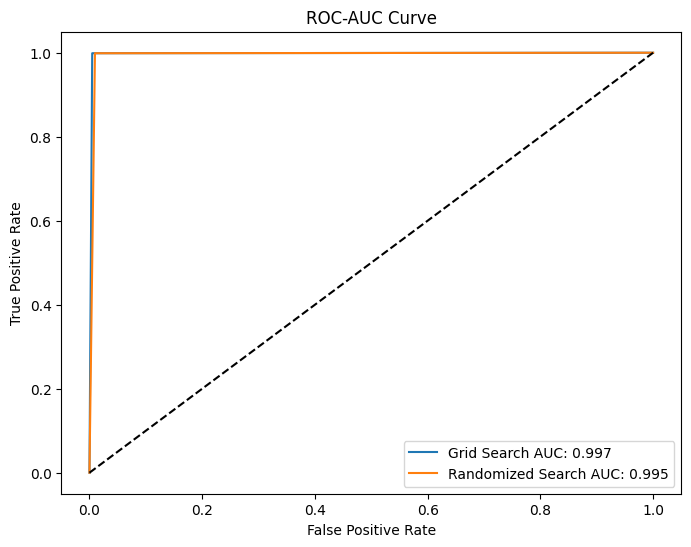

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the AUC and ROC curve for each model
grid_auc = roc_auc_score(y_test, grid_y_pred)
random_auc = roc_auc_score(y_test, random_y_pred)

grid_fpr, grid_tpr, _ = roc_curve(y_test, grid_y_pred)
random_fpr, random_tpr, _ = roc_curve(y_test, random_y_pred)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ROC curves
ax.plot(grid_fpr, grid_tpr, label=f"Grid Search AUC: {grid_auc:.3f}")
ax.plot(random_fpr, random_tpr, label=f"Randomized Search AUC: {random_auc:.3f}")
ax.plot([0, 1], [0, 1], "k--")  # Random chance line
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC-AUC Curve")
ax.legend()

plt.show()

## 2. Precision-Recall Curve

#### The precision-recall curve is another useful metric for evaluating the performance of binary classification models. We can use the precision_recall_curve function from scikit-learn to calculate the precision and recall and plot the curve:

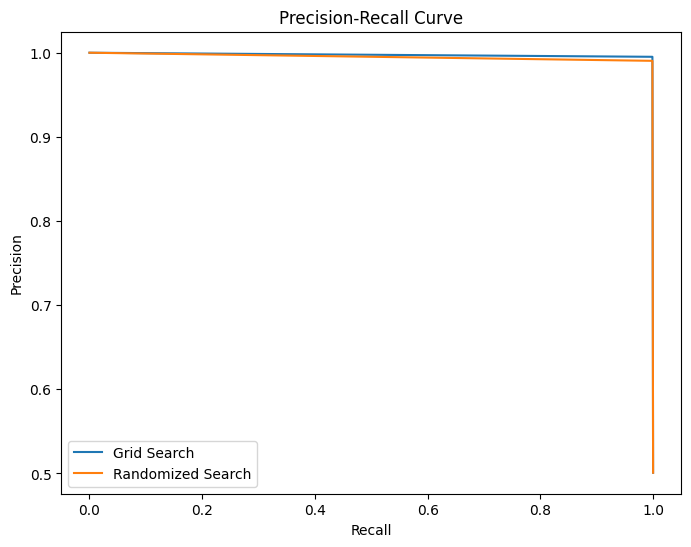

In [45]:
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall for each model
grid_precision, grid_recall, _ = precision_recall_curve(y_test, grid_y_pred)
random_precision, random_recall, _ = precision_recall_curve(y_test, random_y_pred)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the precision-recall curves
ax.plot(grid_recall, grid_precision, label=f"Grid Search")
ax.plot(random_recall, random_precision, label=f"Randomized Search")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision-Recall Curve")
ax.legend()

plt.show()

# Saving the trained best model using joblib

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load your dataset
df = pd.read_csv('Main_cleaned_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Preprocess data
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate features (X) and target (y)
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = df['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and parameter space
rf = RandomForestClassifier()

param_space = {
    'n_estimators': [100, 200],
    'max_features': [None, 'sqrt', 'log2'],  # Corrected the parameter value
    'max_depth': [4, 5, 6],
    'criterion': ['gini', 'entropy']
}

# RandomizedSearchCV with parallelization and fewer iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_space, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
randomized_search_model = random_search.fit(X_train, y_train)

# Save the models using joblib
joblib.dump(randomized_search_model, 'best_randomized_model.joblib')

print("Model has been saved successfully.")

Model has been saved successfully.


# Loading the saved models

In [47]:
grid_search_model_loaded = joblib.load('best_grid_model.joblib')
print("Grid Search model loaded successfully!")

randomized_search_model_loaded = joblib.load('best_randomized_model.joblib')
print("Randomized Search model loaded successfully!")

Grid Search model loaded successfully!
Randomized Search model loaded successfully!


# *Makeing predictions on the test data using the trained model.*

In [48]:
# Preprocess data - similar to your training setup
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig'] 
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate features (X) and target (y)
X = df[['type', 'amount','oldbalanceOrg','newbalanceOrig']]
y = df['isFraud']

# Train-test split - adjust as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Train your XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Load your trained model (if you saved it)
model = joblib.load('best_randomized_model.joblib')

#  Make predictions on new data
new_data = pd.DataFrame({
    'type': [3], 
    'amount': [213680.68],
    'oldbalanceOrg': [0],  # Corrected column name
    'newbalanceOrig': [213680.68]
})
# Preprocess new data (same as during training)
new_data[numerical_cols] = scaler.transform(new_data[numerical_cols]) 

# Make prediction
random_search = RandomizedSearchCV(rf, random_space, cv=5, scoring='accuracy', n_iter=10)
random_result = random_search.fit(X_train, y_train)  # Fit the RandomizedSearchCV instance

# Now you can use the best estimator to make predictions
prediction = random_search.best_estimator_.predict(new_data)

if prediction[0] == 0:
    print("Prediction: 0 - Non-Fraud")
else:
    print("Prediction: 1 - Fraud")

Prediction: 0 - Non-Fraud


In [49]:
# Preprocess data - similar to your training setup
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig'] 
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate features (X) and target (y)
X = df[['type', 'amount','oldbalanceOrg','newbalanceOrig']]
y = df['isFraud']

# Train-test split - adjust as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Train your XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Load your trained model (if you saved it)
model = joblib.load('best_randomized_model.joblib')

#  Make predictions on new data
new_data = pd.DataFrame({
    'type': [4], 
    'amount': [1266752.6],
    'oldbalanceOrg': [1266752.6],  # Corrected column name
    'newbalanceOrig': [0]
})
# Preprocess new data (same as during training)
new_data[numerical_cols] = scaler.transform(new_data[numerical_cols]) 

# Make prediction
random_search = RandomizedSearchCV(rf, random_space, cv=5, scoring='accuracy', n_iter=10)
random_result = random_search.fit(X_train, y_train)  # Fit the RandomizedSearchCV instance

# Now you can use the best estimator to make predictions
prediction = random_search.best_estimator_.predict(new_data)

if prediction[0] == 0:
    print("Prediction: 0 - Non-Fraud")
else:
    print("Prediction: 1 - Fraud")

Prediction: 1 - Fraud


## ***---------------------------------SUCCESSFULLY DONE -------------------------------------------***